In [1]:
import os
import sys
sys.path.append(os.path.abspath("../../src/"))
from reader import *
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from tools import PDFs
import matplotlib.pyplot as plt
import lhapdf
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullFormatter)
#plt.rc('text', usetex=True)
#plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [10]:
dt = DataSets("fit.yaml")
baseCJ = DataSets("fit_CJ.yaml")
baseCTEQ = DataSets("fit_CTEQ.yaml")

Chi2 total :  2594.618527549436
Chi2 w/o penalty :  2560.35542087731
Chi2 total :  2594.618527549436
Chi2 w/o penalty :  2560.35542087731
Chi2 total :  2679.3027609933483
Chi2 w/o penalty :  2645.8782824119735


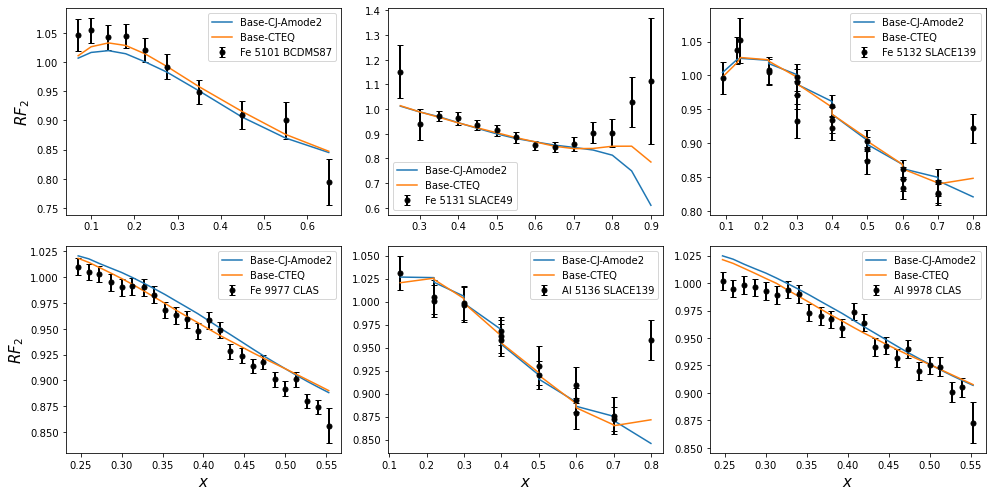

In [17]:
IDs = [[5101, 5131, 5132],
       [9977, 5136, 9978]]
labels = [["Fe 5101 BCDMS87", "Fe 5131 SLACE49", "Fe 5132 SLACE139"], 
          ["Fe 9977 CLAS", "Al 5136 SLACE139", "Al 9978 CLAS"]]
theoryList = [baseCJ, baseCTEQ]
theoryLabels = ["Base-CJ-Amode2", "Base-CTEQ"]
plt.figure(figsize=(14, 7))
for i in range(len (IDs) ) : 
    for j in range(len(IDs[0])) : 
        ax=plt.subplot2grid((len(IDs),len(IDs[0])),(int(i), j))   
        plt.tight_layout()
        id = IDs[i][j]
        df = dt.datasets[id].table 
        x = df["X"] 
        data = df["Data"]
        Err = df["TotError"]
        plt.errorbar(x, data, Err, color='black', marker='o', linestyle='None', linewidth=2, markersize=5, capsize=3, label=labels[i][j])
        for k, th in enumerate(theoryList) :
            theory = th.datasets[id].table["Theory"]
            plt.plot(x, theory, label=theoryLabels[k])
        plt.legend()
        if (i==1) : 
            plt.xlabel("$x$", fontsize=15)
        if (j==0) :
            plt.ylabel("$RF_2$",  fontsize=15)

plt.savefig("DataTheo_nCTEQ22.pdf", bbox_inches="tight")
